In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('boston_housing.csv').values
dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [4]:
# X: age열
x = dataset[:,6:7] # Age 열 (dataset[:,6] → 1D이므로 반드시 6:7 사용할 것)
y = dataset[:,-1] # price 열

In [6]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
yTrain.shape

(404,)

In [10]:
# Scaling (X,y)
from sklearn.preprocessing import StandardScaler
xSC = StandardScaler()
ySC = StandardScaler()

# scaling을 위한 정보 수집(준비): 평균과 분산 등을 찾음
xSC.fit(xTrain)
ySC.fit(yTrain.reshape(-1,1)) 
# scaler에는 반드시 2D 사용
# yTrain은 1D이므로 reshape을 이용하여 2D로 변환
# reshape(-1,1): 1열의 데이터로 변경하고, 행의 수는 데이터에 자동으로 맞춰줌
# reshape(404,1)과 동일
# ex> reshape(-1): 1D array로 변경

# 변환 수행
xTrainSC = xSC.transform(xTrain)
yTrainSC = ySC.transform(yTrain.reshape(-1,1))

# xTrainSC와 yTrainSC: xTrain과 yTrain을 scaling한 결과
# 만약, scaling된 x또는 y를 다시 기존 값으로 변경하기 위해서는
#       xSC.inverse_transform(xTrainSC), ySC.inverse_transform(yTrainSC)

In [17]:
from sklearn.svm import SVR
c = 1
eps = 0.1
poly_d = 2
poly_coef = 1

svrLinear = SVR(kernel='linear',C=c,epsilon=eps)
# kernel = 'linear', 'rbf', 'poly', 'sigmoid' (default='rbf')
# C: C가 클 경우, error 최소화 중요도 커짐, 작을 경우, 정규화 중요도 커짐 (default=1)
# epsilon: 오차 허용 범위 (default=0.1)
svrPoly = SVR(kernel='poly',degree=poly_d,coef0=poly_coef,C=c,epsilon=eps)
# degree: polynomial degree (default=3)
# coef0: (xTx + coef0)^d (default=0)
svrRbf = SVR(kernel='rbf',gamma='scale',C=c,epsilon=eps)
# gamma: 1/(2*variance) (default='scale'=1/(특징수*분산))

In [20]:
svrLinear.fit(xTrainSC,yTrainSC.reshape(-1))
# svr.fit(x,y): x는 2D, y는 1D (y가 2D일 때 경고)
svrPoly.fit(xTrainSC,yTrainSC.reshape(-1))
svrRbf.fit(xTrainSC,yTrainSC.reshape(-1))

SVR(C=1)

In [21]:
# predict에도 반드시 scaling된 데이터 사용
xTestSC = xSC.transform(xTest)

ySCpredLinear = svrLinear.predict(xTestSC)
ySCpredPoly = svrPoly.predict(xTestSC)
ySCpredRbf = svrRbf.predict(xTestSC)
# predict한 결과도 scaling된 결과

In [22]:
# scaling된 예측값을 기존 값으로 역변환
yPredLinear = ySC.inverse_transform(ySCpredLinear)
yPredPoly = ySC.inverse_transform(ySCpredPoly)
yPredRbf = ySC.inverse_transform(ySCpredRbf)

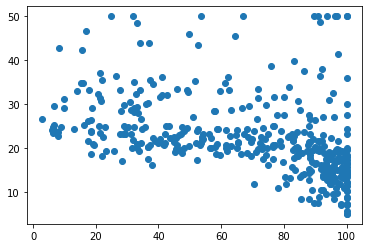

In [23]:
plt.scatter(xTrain,yTrain)